### <center> <u> Linear Regression

#### Regression

The term regression is used when you try to find the relationship between variables. In Machine Learning,
and in statistical modeling, that relationship is used to predict the outcome of future events.

#### Linear Regression

Linear regression uses the relationship between the data-points to draw a straight line through all them. This
line can be used to predict future values. In Machine Learning, predicting the future is very important.

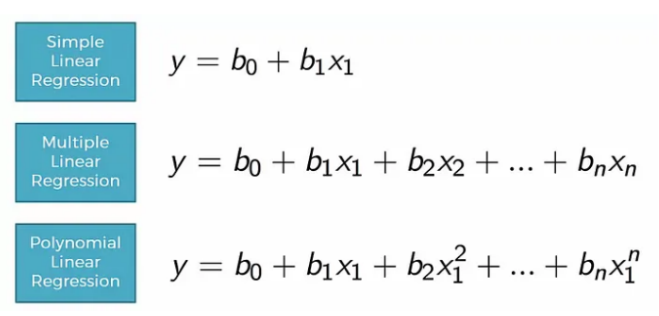

#### Simple Linear Regression

Lets consider independent variable as Age of cars(x) and dependent variable y as their speed.

In [1]:
x = [5,7,9,11,13,15,3,1,15,21]
y = [78,66,55,46,40,35,98,105,39,9]

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
slope,intercept,r,p,std_errror = stats.linregress(x,y)

In [4]:
def my_fun(x):
    return slope*x+intercept

In [5]:
map(my_fun,x)

In [6]:
list(map(my_fun,x))

[80.78497109826591,
 71.31098265895955,
 61.83699421965319,
 52.36300578034683,
 42.88901734104047,
 33.41502890173412,
 90.25895953757227,
 99.73294797687862,
 33.41502890173412,
 4.993063583815044]

In [7]:
my_mod =list(map(my_fun,x))

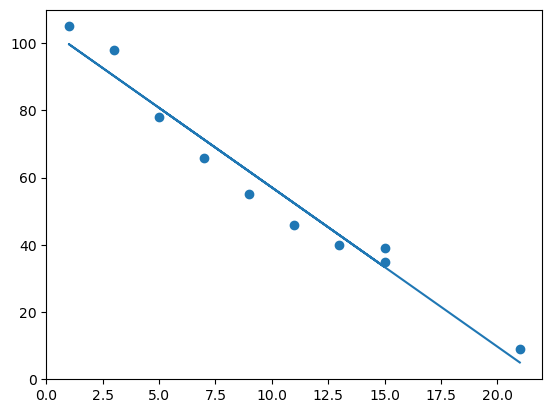

In [8]:
plt.scatter(x,y)
plt.plot(x,my_mod)
plt.show()

In [9]:
r

-0.983115908751939

In [10]:
std_errror

0.3117209792850962

In [11]:
p

3.4838727340059684e-07

The p-value for a hypothesis test whose null hypothesis is that the slope is zero, using Wald Test with t-
distribution of the test statistic. The smaller the p-value the greater the discrepancy. If p is between 0.1 and 0.9, there is certainly no reason to suspect the hypothesis tested, but if it is below 0.05, it strongly indicates
that the hypothesis fails to account for the entire facts.

In [12]:
speed = my_fun(10)

In [13]:
speed

57.10000000000001

#### Example

In [14]:
from pydataset import data

In [15]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


#### Lets load BJ Sales dataset

In [16]:
data1 = data('BJsales')

In [17]:
data1.head()

,time,BJsales
1,1,200.1
2,2,199.5
3,3,199.4
4,4,198.9
5,5,199.0


In [18]:
x = data1['time'].values
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150], dtype=int64)

In [19]:
y = data1['BJsales'].values
y

array([200.1, 199.5, 199.4, 198.9, 199. , 200.2, 198.6, 200. , 200.3,
       201.2, 201.6, 201.5, 201.5, 203.5, 204.9, 207.1, 210.5, 210.5,
       209.8, 208.8, 209.5, 213.2, 213.7, 215.1, 218.7, 219.8, 220.5,
       223.8, 222.8, 223.8, 221.7, 222.3, 220.8, 219.4, 220.1, 220.6,
       218.9, 217.8, 217.7, 215. , 215.3, 215.9, 216.7, 216.7, 217.7,
       218.7, 222.9, 224.9, 222.2, 220.7, 220. , 218.7, 217. , 215.9,
       215.8, 214.1, 212.3, 213.9, 214.6, 213.6, 212.1, 211.4, 213.1,
       212.9, 213.3, 211.5, 212.3, 213. , 211. , 210.7, 210.1, 211.4,
       210. , 209.7, 208.8, 208.8, 208.8, 210.6, 211.9, 212.8, 212.5,
       214.8, 215.3, 217.5, 218.8, 220.7, 222.2, 226.7, 228.4, 233.2,
       235.7, 237.1, 240.6, 243.8, 245.3, 246. , 246.3, 247.7, 247.6,
       247.8, 249.4, 249. , 249.9, 250.5, 251.5, 249. , 247.6, 248.8,
       250.4, 250.7, 253. , 253.7, 255. , 256.2, 256. , 257.4, 260.4,
       260. , 261.3, 260.4, 261.6, 260.8, 259.8, 259. , 258.9, 257.4,
       257.7, 257.9,

#### Task: Do simple linear regression 

In [20]:
slope,intercept,r,p,std_errror = stats.linregress(x,y)

In [21]:
def my_func(x):
    return slope*x+intercept

In [22]:
map(my_func,x)

In [23]:
list(map(my_func,x))

[196.67888741721853,
 197.12585537134984,
 197.57282332548112,
 198.01979127961243,
 198.46675923374372,
 198.91372718787503,
 199.3606951420063,
 199.80766309613762,
 200.2546310502689,
 200.7015990044002,
 201.1485669585315,
 201.5955349126628,
 202.04250286679408,
 202.48947082092536,
 202.93643877505667,
 203.38340672918795,
 203.83037468331926,
 204.27734263745054,
 204.72431059158185,
 205.17127854571314,
 205.61824649984445,
 206.06521445397573,
 206.51218240810704,
 206.95915036223832,
 207.40611831636963,
 207.8530862705009,
 208.30005422463222,
 208.7470221787635,
 209.19399013289478,
 209.6409580870261,
 210.08792604115737,
 210.53489399528868,
 210.98186194941997,
 211.42882990355128,
 211.87579785768256,
 212.32276581181387,
 212.76973376594515,
 213.21670172007646,
 213.66366967420774,
 214.11063762833905,
 214.55760558247033,
 215.00457353660164,
 215.45154149073292,
 215.8985094448642,
 216.3454773989955,
 216.7924453531268,
 217.2394133072581,
 217.68638126138939,
 218

In [24]:
my_model = list(map(my_func,x))

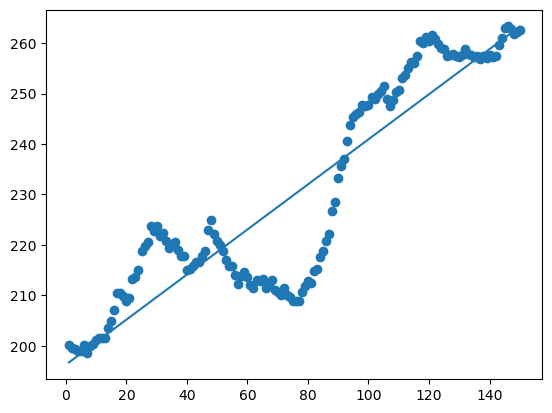

In [25]:
plt.scatter(x,y)
plt.plot(x,my_model)
plt.show()

In [26]:
r

0.9040489498420919

In [27]:
std_errror

0.017370707365110552

In [28]:
p

1.6869378659450514e-56

In [29]:
BJsales = my_func(10)

In [30]:
BJsales

200.7015990044002

In [31]:
from pydataset import data
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


### Lets load BOD dataset

In [32]:
data2 = data('BOD')
data2.head()

,Time,demand
1,1,8.3
2,2,10.3
3,3,19.0
4,4,16.0
5,5,15.6


In [33]:
x = data2['Time'].values
x

array([1, 2, 3, 4, 5, 7], dtype=int64)

In [34]:
y = data2['demand'].values
y

array([ 8.3, 10.3, 19. , 16. , 15.6, 19.8])

In [35]:
slope,intercept,r,p,std_errror = stats.linregress(x,y)

In [36]:
def my_f(x):
    return slope*x+intercept

In [37]:
map(my_f,x)

In [38]:
list(map(my_f,x))

[10.242857142857144,
 11.964285714285715,
 13.685714285714287,
 15.407142857142858,
 17.12857142857143,
 20.571428571428573]

In [39]:
my_m = list(map(my_f,x))

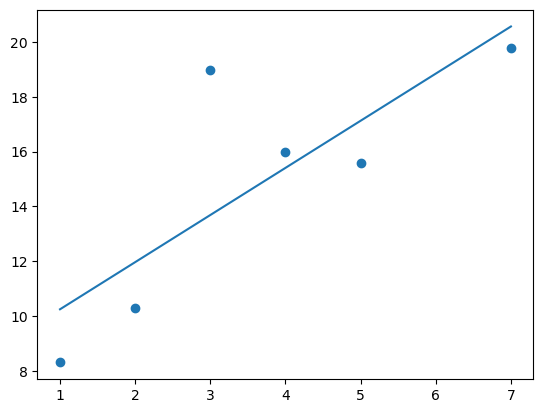

In [40]:
plt.scatter(x,y)
plt.plot(x,my_m)
plt.show()

In [41]:
r

0.8030692561968412

In [42]:
std_errror

0.6386589105944052

In [43]:
p

0.05435392051073662

In [44]:
demand = my_f(10)

In [45]:
demand

25.735714285714288

### Machine Learning - Polynomial Regression

#### Polynomial Regression

If your data points clearly will not fit a linear regression (a straight line through all data points), it might be
ideal for polynomial regression. Polynomial regression, like linear regression, uses the relationship between
the variables x and y to find the best way to draw a line through the data points.

#### How Does it Work?

Python has methods for finding a relationship between data-points and to draw a line of polynomial
regression. We will show you how to use these methods instead of going through the mathematic formula. In
the example below, we have registered 18 cars as they were passing a certain tollbooth. We have registered
the car's speed, and the time of day (hour) the passing occurred. The x-axis represents the hours of the day
and the y-axis represents the speed:

In [46]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
y = [100,90,80,70,60,50,45,40,52,55,58,63,67,69,71,75,79,83,88,92,95,99]

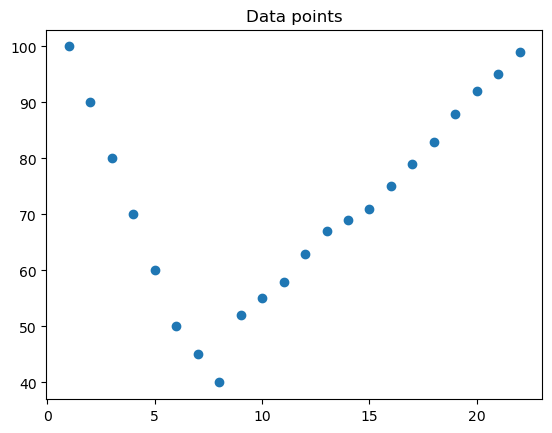

In [47]:
plt.scatter(x,y)
plt.title("Data points")
plt.show()

* NumPy has a method that lets us make a polynomial model:

In [48]:
my_mod = np.poly1d(np.polyfit(x,y,3))

* Specify how the line will display, we start at position 1, and end at position 22:

In [49]:
my_line = np.linspace(1,22,100)

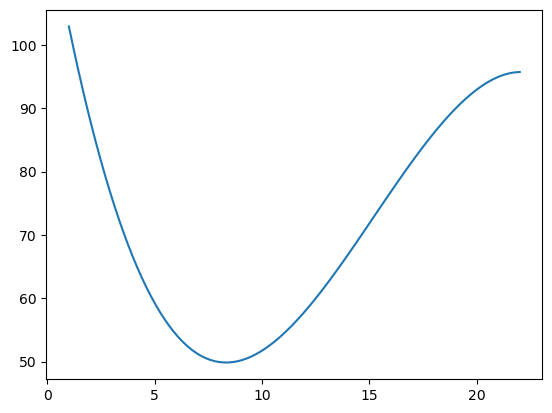

In [50]:
plt.plot(my_line,my_mod(my_line))
plt.show()

#### R-Squared

It is important to know how well the relationship between the values of the x- and y-axis is, if there are no
relationship the polynomial regression can not be used to predict anything. The relationship is measured with
a value called the r-squared. The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1
means 100% related. Python and the Sklearn module will compute this value for you, all you have to do is
feed it with the x and y arrays:

In [51]:
from sklearn.metrics import r2_score

In [52]:
r2_score(y,my_mod(x))

0.9527224960477652

In [53]:
speed = my_mod(19)

In [54]:
speed

89.92335582038073

### Machine Learning - Multiple Regression

#### Multiple Regression

Multiple regression is like linear regression, but with more than one independent value, meaning that we try
to predict a value based on two or more variables. Take a look at the data set below, it contains some
information about cars.

In [55]:
import pandas as pd

In [56]:
data = pd.read_csv('./cars.csv')
data.head(10)

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


#### Splitting the data into IV and DV

In [57]:
x = data.iloc[:,2:-1].values

In [65]:
y = data.iloc[:,-1].values

In [66]:
x

array([[1000,  790],
       [1200, 1160],
       [1000,  929],
       [ 900,  865],
       [1500, 1140],
       [1000,  929],
       [1400, 1109],
       [1500, 1365],
       [1500, 1112],
       [1600, 1150],
       [1100,  980],
       [1300,  990],
       [1000, 1112],
       [1600, 1252],
       [1600, 1326],
       [1600, 1330],
       [1600, 1365],
       [2200, 1280],
       [1600, 1119],
       [2000, 1328],
       [1600, 1584],
       [2000, 1428],
       [2100, 1365],
       [1600, 1415],
       [2000, 1415],
       [1500, 1465],
       [2000, 1490],
       [2000, 1725],
       [1600, 1523],
       [2000, 1705],
       [2100, 1605],
       [2000, 1746],
       [1600, 1235],
       [1600, 1390],
       [1600, 1405],
       [2500, 1395]], dtype=int64)

In [67]:
y

array([ 99,  95,  95,  90, 105, 105,  90,  92,  98,  99,  99, 101,  99,
        94,  97,  97,  99, 104, 104, 105,  94,  99,  99,  99,  99, 102,
       104, 114, 109, 114, 115, 117, 104, 108, 109, 120], dtype=int64)

#### MLR using statsmodel

* statsmodel.api as sm

In [68]:
import statsmodels.api as sm

In [69]:
x_stat = sm.add_constant(x)

In [70]:
x_stat

array([[1.000e+00, 1.000e+03, 7.900e+02],
       [1.000e+00, 1.200e+03, 1.160e+03],
       [1.000e+00, 1.000e+03, 9.290e+02],
       [1.000e+00, 9.000e+02, 8.650e+02],
       [1.000e+00, 1.500e+03, 1.140e+03],
       [1.000e+00, 1.000e+03, 9.290e+02],
       [1.000e+00, 1.400e+03, 1.109e+03],
       [1.000e+00, 1.500e+03, 1.365e+03],
       [1.000e+00, 1.500e+03, 1.112e+03],
       [1.000e+00, 1.600e+03, 1.150e+03],
       [1.000e+00, 1.100e+03, 9.800e+02],
       [1.000e+00, 1.300e+03, 9.900e+02],
       [1.000e+00, 1.000e+03, 1.112e+03],
       [1.000e+00, 1.600e+03, 1.252e+03],
       [1.000e+00, 1.600e+03, 1.326e+03],
       [1.000e+00, 1.600e+03, 1.330e+03],
       [1.000e+00, 1.600e+03, 1.365e+03],
       [1.000e+00, 2.200e+03, 1.280e+03],
       [1.000e+00, 1.600e+03, 1.119e+03],
       [1.000e+00, 2.000e+03, 1.328e+03],
       [1.000e+00, 1.600e+03, 1.584e+03],
       [1.000e+00, 2.000e+03, 1.428e+03],
       [1.000e+00, 2.100e+03, 1.365e+03],
       [1.000e+00, 1.600e+03, 1.41

* sm.add_constant(X): in the case of the OLS() function from statsmodels.api, before we fit the model, we
need to use the sm.add_constant(X) function, which adds a column of constants to the X dataframe, before passing that into the OLS() function. This is a structural requirement so that the ordinary least squares
estimation can be performed properly.

In [71]:
MLR = sm.OLS(y,x_stat).fit()

In [73]:
MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000411
Time:                        10:20:45   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.6947      5.564     14.322      0.000      68.374      91.016
x1             0.0078      0.004      1.948      0.060      -0.000       0.016
x2             0.0076      0.006      1.173      0.249      -0.006       0.021
==============================================================================
Omnibus:                        4.957   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                1.836
Skew:                          -0.025   Prob(JB):                        0.399
Kurtosis:                       1.895   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Making the predictions

In [74]:
MLR.predict(x_stat)

array([ 93.46522516,  97.82012716,  94.51480683,  93.25102045,
       100.01068547,  94.51480683,  98.99608035, 101.70964861,
        99.79925895, 100.8667207 ,  95.6804309 ,  97.31699187,
        95.89663018, 101.63691732, 102.19568742, 102.22589121,
       102.49017436, 106.53149836, 100.63264133, 105.33289232,
       104.14383181, 106.08798705, 106.39280312, 102.86772172,
       105.98982473, 102.46474333, 106.55614578, 108.33061839,
       103.68322403, 108.17959944, 108.20503047, 108.48918828,
       101.50855121, 102.67894804, 102.79221225, 109.74143455])

#### statsmodel.formula.api

In [75]:
import statsmodels.formula.api as smf

In [76]:
model_smf = smf.ols(formula='CO2 ~ Weight+Volume',data=data)

* The syntax for the formula starts with the y variable name also known as your response, outcome, or
dependent variable, followed by a tilde, ~, and then followed by your X variable names also know as your
predictor, input, or independent variables. In this case, we only have 1 X variable, so the formula looks like y
~ X. If there were multiple X variables, the formula would look like y ~ X1 + X2 + X3 + ... + Xn, where a +
would separate each X variable. The smf.ols() function also takes in a data argument, which is our
dataframe, df in this case

In [77]:
result_smf = model_smf.fit()

In [78]:
result_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           0.000411
Time:                        10:24:12   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.6947      5.564     14.322      0.000      68.374      91.016
Weight         0.0076      0.006      1.173      0.249      -0.006       0.021
Volume         0.0078      0.004      1.948      0.060      -0.000       0.016
==============================================================================
Omnibus:                        4.957   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                1.836
Skew:                          -0.025   Prob(JB):                        0.399
Kurtosis:                       1.895   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
y_pred_sm = result_smf.predict(data[['Volume','Weight']])

In [81]:
y_pred_sm

0      93.465225
1      97.820127
2      94.514807
3      93.251020
4     100.010685
5      94.514807
6      98.996080
7     101.709649
8      99.799259
9     100.866721
10     95.680431
11     97.316992
12     95.896630
13    101.636917
14    102.195687
15    102.225891
16    102.490174
17    106.531498
18    100.632641
19    105.332892
20    104.143832
21    106.087987
22    106.392803
23    102.867722
24    105.989825
25    102.464743
26    106.556146
27    108.330618
28    103.683224
29    108.179599
30    108.205030
31    108.489188
32    101.508551
33    102.678948
34    102.792212
35    109.741435
dtype: float64

#### Regression using Scikit-Learn module

#### Importing the scikit-learn model

In [82]:
from sklearn.linear_model import LinearRegression

#### Initialising the model

In [83]:
LR = LinearRegression()

#### Fitting the model to the algorithm 

In [84]:
LR.fit(x,y)

LinearRegression()

#### Finding the coefficient

In [85]:
LR.coef_

array([0.00780526, 0.00755095])

#### Finding the intercept

In [86]:
LR.intercept_

79.6947192911594

#### Model Score

In [87]:
LR.score(x,y)

0.3765564043619989

#### Making predictions

* Lets get the prediction for the very first row

In [88]:
sample_prediction = LR.predict([[1000,790]])
sample_prediction

array([93.46522516])

#### Making predictions on entire 'x'

In [89]:
y_pred = LR.predict(x)

In [90]:
y_pred

array([ 93.46522516,  97.82012716,  94.51480683,  93.25102045,
       100.01068547,  94.51480683,  98.99608035, 101.70964861,
        99.79925895, 100.8667207 ,  95.6804309 ,  97.31699187,
        95.89663018, 101.63691732, 102.19568742, 102.22589121,
       102.49017436, 106.53149836, 100.63264133, 105.33289232,
       104.14383181, 106.08798705, 106.39280312, 102.86772172,
       105.98982473, 102.46474333, 106.55614578, 108.33061839,
       103.68322403, 108.17959944, 108.20503047, 108.48918828,
       101.50855121, 102.67894804, 102.79221225, 109.74143455])

In [91]:
r2_score(y, y_pred)

0.3765564043619989